In [56]:
import pandas as pd
import hdbscan

In [57]:
df = pd.read_csv('input/earthquakes-test-small.csv', encoding='utf-8')
df.head()

,lat,lon
0,19.246,145.616
1,1.863,127.352
2,-20.579,-173.972
3,-59.076,-23.557
4,11.938,126.427


In [58]:
clusterer = hdbscan.HDBSCAN()

In [59]:
clusterer.fit(df)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [60]:
clusterer.fit(df)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [61]:
clusterer.labels_

array([463, 803,   0, ...,  -1,  -1,  -1], dtype=int64)

In [62]:
clusterer.probabilities_

array([0.41683539, 1.        , 1.        , ..., 0.        , 0.        ,
       0.        ])

In [63]:
from sklearn.metrics.pairwise import pairwise_distances

In [64]:
distance_matrix = pairwise_distances(blobs)
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(distance_matrix)
clusterer.labels_

array([1, 2, 2, ..., 0, 1, 0], dtype=int64)

In [ ]:
# pull row from original data set where lat/lon match the lat/lon of each row of representative points
# that way we get the full details like city, country, and date from the original dataframe
rs = rep_points.apply(lambda row: df[(df['lat']==row['lat']) & (df['lon']==row['lon'])].iloc[0], axis=1)
rs.to_csv('output/earthquakes-test-small-hdbscan.csv', encoding='utf-8')
rs.tail()

In [65]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time

In [72]:
import os

os.environ['PROJ_LIB'] = r'C:\Users\EasyE\Anaconda3\Library\share'

C:\Users\EasyE\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


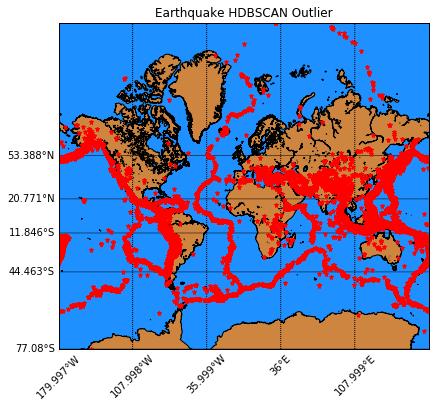

In [77]:
#!/usr/bin/python
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import csv

#appended list
lat, lon = [],[]


#44 years of earthquakes
with open('output/earthquakes-test-small-hdbscan.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        #names.append(data['CALL'])
        lat.append(float(data['lat']))
        lon.append(float(data['lon']))
        #altitude.append(float(data['ELEV']))

# How much to zoom from coordinates (in degrees)
zoom_scale = 0

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lat)-zoom_scale,np.max(lat)+zoom_scale,\
        np.min(lon)-zoom_scale,np.max(lon)+zoom_scale]

plt.figure(figsize=(12,6))
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='dodgerblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=45)
m.drawmapboundary(fill_color='dodgerblue')

# build and plot coordinates onto map
x,y = m(lon,lat)
m.plot(x,y,'r*',markersize=5)
plt.title("Earthquake HDBSCAN Outlier")
plt.savefig('output/earthquake_outliers.png', format='png', dpi=500)
plt.show()

#Code Example
#https://makersportal.com/blog/2018/7/20/geographic-mapping-from-a-csv-file-using-python-and-basemap